<img src="https://admissions.ntust.edu.tw/front_index/images/logo.png" alt="drawing" width="600"/>
<hr>
<h1><center>MACHINE LEARNING : HOMEWORK 2</center></h1>
<h1><center>Data 1 : Wealth prediction</center></h1>
<h4>Hector LANDES - M10601810</h4>
<h4>Machine Learning - CS5087701</h4>

In [1]:
#pip install keras
#pip install tensorflow
#pip install ann_visualizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz;
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Hector Landes\graphviz-2.38\release\bin'

In [2]:
path = r'C:\Users\Hector Landes\Desktop\Data Science Projects\20191005 Homework_1_ML\2. Prepared Data\adult.csv'

In [3]:
data = pd.read_csv (path, names=["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
                           "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
                                 "hours_per_week", "native_country", "wealth"],
                   index_col=False)

<ul>
<h3>Preprocessing from the HM1</3>
</ul>

In [4]:
data = data[(data.astype(str) != ' ?').all(axis=1)]

In [5]:
data = pd.get_dummies(data, columns=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex'])

In [6]:
data['native_country'] = data['native_country'].str.strip()

In [7]:
data['native_country'] = data['native_country'].replace(['Japan', 'Cambodia', "Philippines", 
                                                         "India", "China", "Vietnam", "Taiwan", "Iran", 
                                                         "Hong", "Laos", "Thailand"], 'Asia')
data['native_country'] = data['native_country'].replace(["Germany", "England", "Italy", "Poland", "Portugal",
                                                         "Greece", "France", "Ireland", "Yugoslavia", "Hungary", 
                                                         "Scotland", "Holand-Netherlands"], 'Europe')
data['native_country'] = data['native_country'].replace(["Mexico","El-Salvador", "Cuba", "Jamaica", 'South', 
                                                         "Dominican-Republic", "Guatemala", "Columbia", "Haiti", 
                                                         "Nicaragua", "Peru", "Ecuador", "Trinadad&Tobago", "Honduras"], 
                                                        'South&Central America')
data['native_country'] = data['native_country'].replace(["United-States", 'Puerto-Rico', 'Canada',
                                                         'Outlying-US(Guam-USVI-etc)'], 'United_States')

In [8]:
data.rename(columns={'native_country':'native_region'}, inplace=True)

In [9]:
data = pd.get_dummies(data, columns=['native_region'])

In [10]:
non_zero_value = data.loc[data["capital_loss"] != 0]

In [11]:
data.loc[data["capital_loss"] != 0, ["capital_loss"]] = 1

In [12]:
non_zero_value = data.loc[data["capital_gain"] != 0]

In [13]:
data.loc[data["capital_gain"] != 0, ["capital_gain"]] = 1

In [14]:
data = data.drop(['fnlwgt'], axis=1)

In [15]:
data['bi_wealth'] = data.apply(lambda row: 1 if '>50K'in row['wealth'] else 0, axis=1)

In [16]:
data = data.drop(['wealth'], axis=1)

<ul>
<h3> Normalize the data </h3> 
</ul>

In [267]:
#norm_df = (data.columns[:66] - data.columns[:66].mean()) / data.columns[:66].std()
#OR
norm_df = (data - data.min()) / (data.max() - data.min())

In [278]:
norm_df.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_region_Asia,native_region_Europe,native_region_South&Central America,native_region_United_States,bi_wealth
0,0.301370,0.800000,1.0,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.452055,0.800000,0.0,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.287671,0.533333,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.493151,0.400000,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.150685,0.800000,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


<ul>
<h3> X as the Feature Matrix </h3> 
</ul>

In [279]:
X = norm_df[norm_df.columns[:66]]
X[0:2]

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_region_Asia,native_region_Europe,native_region_South&Central America,native_region_United_States
0,0.301370,0.8,1.0,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.452055,0.8,0.0,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


<ul>
<h3> Y as the Target Value </h3> 
</ul>

In [280]:
Y = norm_df["bi_wealth"].astype('int')
Y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: bi_wealth, dtype: int32

Now we will split the data in training and testing data

In [281]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.2, random_state=3)

In [272]:
print('Feature matrix ->   Training:',X_trainset.shape,'   Testing:',X_testset.shape)
print('Target value   ->   Training:',Y_trainset.shape,'      Testing:',Y_testset.shape)

Feature matrix ->   Training: (24129, 66)    Testing: (6033, 66)
Target value   ->   Training: (24129,)       Testing: (6033,)


<ul>
<h3>Define Keras Model</3>
</ul>

In [451]:
model = Sequential()
model.add(Dense(12, input_dim=66, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

<ul>
<h3>Compile Keras Model<h/3>
</ul>

In [452]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

<ul>
<h3>Fit Keras Model</h3>
</ul>

In [453]:
history = model.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=100, batch_size=100) #150 epochs normalyand 10 for batch

Train on 24129 samples, validate on 6033 samples
Epoch 1/100
24129/24129 [==============================] - 0s 11us/step - loss: 0.5663 - accuracy: 0.7408 - val_loss: 0.5207 - val_accuracy: 0.7423
Epoch 2/100
24129/24129 [==============================] - 0s 9us/step - loss: 0.4818 - accuracy: 0.7543 - val_loss: 0.4636 - val_accuracy: 0.7532
Epoch 3/100
24129/24129 [==============================] - 0s 9us/step - loss: 0.4409 - accuracy: 0.7849 - val_loss: 0.4323 - val_accuracy: 0.7950
Epoch 4/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.4182 - accuracy: 0.8128 - val_loss: 0.4137 - val_accuracy: 0.8052
Epoch 5/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.4042 - accuracy: 0.8184 - val_loss: 0.4013 - val_accuracy: 0.8102
Epoch 6/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.3944 - accuracy: 0.8215 - val_loss: 0.3925 - val_accuracy: 0.8162
Epoch 7/100
24129/24129 [==============================] - 0s 10u

Epoch 56/100
24129/24129 [==============================] - 0s 9us/step - loss: 0.3406 - accuracy: 0.8409 - val_loss: 0.3414 - val_accuracy: 0.8372
Epoch 57/100
24129/24129 [==============================] - 0s 9us/step - loss: 0.3405 - accuracy: 0.8408 - val_loss: 0.3415 - val_accuracy: 0.8367
Epoch 58/100
24129/24129 [==============================] - 0s 9us/step - loss: 0.3403 - accuracy: 0.8409 - val_loss: 0.3412 - val_accuracy: 0.8372
Epoch 59/100
24129/24129 [==============================] - 0s 9us/step - loss: 0.3402 - accuracy: 0.8406 - val_loss: 0.3411 - val_accuracy: 0.8367
Epoch 60/100
24129/24129 [==============================] - 0s 9us/step - loss: 0.3400 - accuracy: 0.8404 - val_loss: 0.3412 - val_accuracy: 0.8366
Epoch 61/100
24129/24129 [==============================] - 0s 9us/step - loss: 0.3399 - accuracy: 0.8406 - val_loss: 0.3409 - val_accuracy: 0.8376
Epoch 62/100
24129/24129 [==============================] - 0s 9us/step - loss: 0.3398 - accuracy: 0.8405 - val_

<ul>
<h3>Cross-Validation</h3>
</ul>

In [60]:
from sklearn.model_selection import StratifiedKFold

In [67]:
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y):
    
    #Define Keras Model
    model = Sequential()
    model.add(Dense(12, input_dim=66, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=10, batch_size=2000, verbose=0)
    
    # evaluate the model
    scores =  model.evaluate(X_testset, Y_testset, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 80.94%
accuracy: 77.42%
accuracy: 78.77%
accuracy: 74.23%
accuracy: 74.23%
accuracy: 73.74%
accuracy: 78.68%
accuracy: 76.91%
accuracy: 74.23%
accuracy: 74.13%
76.33% (+/- 2.43%)


In [392]:
accuracy = model.evaluate(X_testset, Y_testset)
print('Accuracy: %.2f' % (accuracy[1]*100),'%')
print('Loss: %.2f' % (accuracy[0]*100),'%')

6033/6033 [==============================] - 0s 13us/step
Accuracy: 83.51 %
Loss: 35.31 %


In [99]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

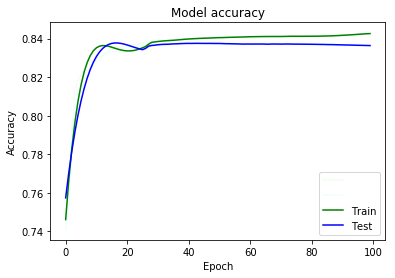

In [461]:
x = list(range(0, 100))
y1 = history.history['accuracy'] 
y2 = history.history['val_accuracy'] 
yhat1 = savgol_filter(y1, 51, 5) # window size 51, polynomial order 3
yhat2 = savgol_filter(y2, 51, 4) # window size 51, polynomial order 3
plt.plot(x,y1, color='honeydew')
plt.plot(x,y2, color='azure')
plt.plot(x,yhat1, color='green')
plt.plot(x,yhat2, color='blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['', '', 'Train', 'Test'], loc='best')
plt.show()

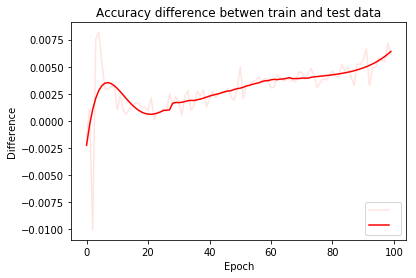

In [458]:
X = history.history['accuracy']
Y = history.history['val_accuracy'] 
x_y = [x - y for x, y in zip(X, Y)]

x = list(range(0, 100))
y = x_y
yhat = savgol_filter(y, 51, 5) # window size 51, polynomial order 3
plt.plot(x,y, color='mistyrose')
plt.plot(x,yhat, color='red')
plt.title('Accuracy difference betwen train and test data')
plt.ylabel('Difference')
plt.xlabel('Epoch')
plt.legend(['', '', 'train', 'test'], loc='best')
plt.show()

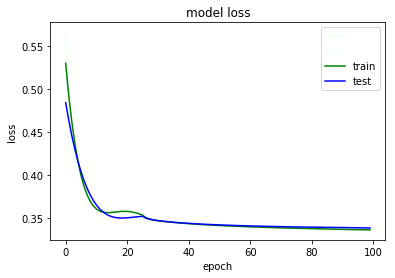

In [463]:
x = list(range(0, 100))
y1 = history.history['loss'] 
y2 = history.history['val_loss'] 
yhat1 = savgol_filter(y1, 51, 5) # window size 501, polynomial order 3
yhat2 = savgol_filter(y2, 51, 4) # window size 501, polynomial order 3
plt.plot(x,y1, color='honeydew')
plt.plot(x,y2, color='azure')
plt.plot(x,yhat1, color='green')
plt.plot(x,yhat2, color='blue')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['', '', 'train', 'test'], loc='best')
plt.show()

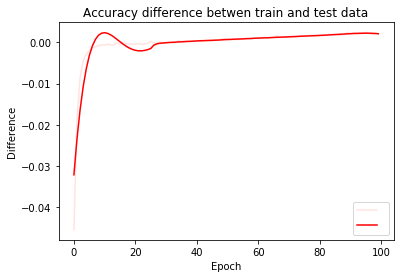

In [469]:
X = history.history['val_loss']
Y = history.history['loss'] 
x_y = [x - y for x, y in zip(X, Y)]

x = list(range(0, 100))
y = x_y
yhat = savgol_filter(y, 51, 5) # window size 51, polynomial order 3
plt.plot(x,y, color='mistyrose')
plt.plot(x,yhat, color='red')
plt.title('Accuracy difference betwen train and test data')
plt.ylabel('Difference')
plt.xlabel('Epoch')
plt.legend(['', '', 'train', 'test'], loc='best')
plt.show()

<h1>Je vais fais quoi avec toute ces cross-validation?</h1>

<ul>
<h3>Predictions</h3>
</ul>

In [26]:
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]

In [27]:
predictions = model.predict_classes(X)

In [28]:
for i in range(10):
    print('%d (expected %d)' % (predictions[i], Y[i]))

0 (expected 0)
0 (expected 0)
0 (expected 0)
0 (expected 0)
0 (expected 0)
1 (expected 0)
0 (expected 0)
0 (expected 1)
0 (expected 1)
1 (expected 1)


<ul>
<h3>Plot the ANN</h3>
</ul>

In [403]:
ann_viz(model, title="Wealth Prediction")